In [420]:
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_treated_new.pkl'))

df = df.dropna()
df.head()

,ano,sigla_uf,escola_publica,id_aluno,situacao_censo,disciplina,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb,...,id_escola,serie,turno,desempenho_aluno_cat,leitura,frequenta_entretenimento,responsaveis_incentivam,escolaridade_pais,leitura_pais,estuda_regularmente
27111,2015,PB,1,17523018,0,MT,-0.627672,0.648351,214.882332,36.237847,...,25083490,9,3,0,0.857143,0.75,1.0,2.5,1.0,1.000000
27112,2015,PB,1,17491737,0,LP,-1.027257,0.354996,193.389947,19.557923,...,61134907,9,1,0,1.142857,1.75,1.0,2.0,1.0,2.000000
27115,2015,PB,1,17491737,0,MT,-0.807123,0.639382,204.852398,35.736548,...,61134907,9,1,0,1.142857,1.75,1.0,2.0,1.0,2.000000
27117,2015,PB,1,17523323,0,LP,-1.799137,0.475179,150.864483,26.179209,...,25084526,9,1,0,0.833333,0.50,1.0,0.5,1.0,1.333333
27118,2015,PB,1,17523323,0,MT,-1.013599,0.505411,193.311973,28.248597,...,25084526,9,1,0,0.833333,0.50,1.0,0.5,1.0,1.333333


In [421]:
print(df.columns)

Index(['ano', 'sigla_uf', 'escola_publica', 'id_aluno', 'situacao_censo',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento', 'idade', 'possui_computador', 'tempo_lazer',
       'gosta_estudar_disciplina', 'rede', 'id_escola', 'serie', 'turno',
       'desempenho_aluno_cat', 'leitura', 'frequenta_entretenimento',
       'responsaveis_incentivam', 'escolaridade_pais', 'leitura_pais',
       'estuda_regularmente'],
      dtype='object')


In [422]:
# distribuição das classes
df['desempenho_aluno'].value_counts(dropna=False)

desempenho_aluno
Básico          38265
Insuficiente    21129
Proficiente     10989
Avançado         1710
Name: count, dtype: int64

In [423]:
# dropping 'Avançado' class

df = df[df['desempenho_aluno'] != 'Avançado']

In [424]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno']

In [425]:
ignore_fe_columns = ['leitura', 'leitura_pais', 'responsaveis_incentivam', 'estuda_regularmente']

In [426]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from IPython.display import clear_output

clear_output()

In [427]:
num_classes = len(df['desempenho_aluno'].unique())

In [428]:
df = df[df['disciplina'] == 'MT']

# using softmax + over sampling

In [286]:
X = df.drop(columns=exclude + ignore_fe_columns + ['desempenho_aluno_cat'])
y = df['desempenho_aluno_cat']

In [287]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Supondo que 'X' são as features e 'y' a coluna 'desempenho_aluno'
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(f"Distribuição das classes após oversampling: {Counter(y_resampled)}")

Distribuição das classes após oversampling: Counter({0: 19016, 1: 19016, 2: 19016})


In [288]:
y = to_categorical(y_resampled)
y_values = y_resampled
X = X_resampled

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [290]:
# print unique values for each col
for col in range(X_train.shape[1]):
    print(col, np.unique(X_train[:, col]))

0 [0.  0.2 0.4 0.6 0.8 1. ]
1 [0. 1.]
2 [0.   0.25 0.5  0.75 1.  ]
3 [0. 1.]
4 [0.         0.125      0.16666667 0.25       0.33333333 0.375
 0.5        0.625      0.66666667 0.75       0.83333333 0.875
 1.        ]
5 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [291]:
print(X_train.shape)

(45638, 6)


In [292]:
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu', kernel_initializer='normal'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107 (428.00 B)

 Trainable params: 107 (428.00 B)

 Non-trainable params: 0 (0.00 B)

In [293]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es], class_weight=class_weights)

Epoch 1/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3412 - loss: 1.6003 - val_accuracy: 0.4331 - val_loss: 1.2295
Epoch 2/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4313 - loss: 1.1971 - val_accuracy: 0.4387 - val_loss: 1.2312
Epoch 3/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4376 - loss: 1.1933 - val_accuracy: 0.4280 - val_loss: 1.2608
Epoch 4/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4317 - loss: 1.1959 - val_accuracy: 0.4432 - val_loss: 1.2106
Epoch 5/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4350 - loss: 1.1974 - val_accuracy: 0.4394 - val_loss: 1.2268
Epoch 6/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4326 - loss: 1.1980 - val_accuracy: 0.4354 - val_loss: 1.2535
Epoch 7/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4333 - loss: 1.1952 - val_accuracy: 0.4340 - val_loss: 1.2375
Epoch 8/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4357 - loss: 1.1882 - val_accu

In [294]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
              precision    recall  f1-score   support

           0       0.61      0.35      0.44      3022
           1       0.00      0.00      0.00      3043
           2       0.40      0.96      0.56      3063

    accuracy                           0.44      9128
   macro avg       0.33      0.43      0.33      9128
weighted avg       0.33      0.44      0.33      9128



/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


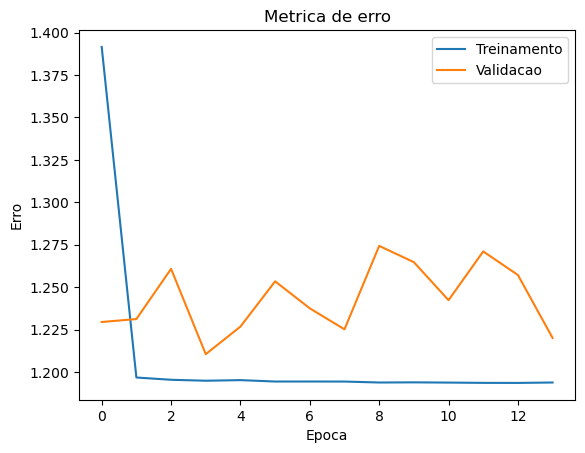

1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step

--> Acuracia (treino): 0.3836
--> Acuracia (validacao): 0.3842
--> acc_train - acc_val = -0.0007
--> E_val - E_in = 0.0262


In [295]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# using softmax + class weights

In [404]:
X = df.drop(columns=exclude + ignore_fe_columns + ['desempenho_aluno_cat'])
y = df['desempenho_aluno_cat']

y = to_categorical(y)

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [412]:
# print unique values for each col
for col in range(X_train.shape[1]):
    print(col, np.unique(X_train[:, col]))

0 [0.  0.2 0.4 0.6 0.8 1. ]
1 [0. 1.]
2 [0.   0.25 0.5  0.75 1.  ]
3 [0. 1.]
4 [0.         0.125      0.16666667 0.25       0.33333333 0.375
 0.5        0.625      0.66666667 0.75       0.83333333 0.875
 1.        ]
5 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [406]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Supondo que y_train seja uma matriz one-hot encoded
y_train_labels = np.argmax(y_train, axis=1)
classes = np.unique(y_train_labels)

# Calcular pesos de classe
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_labels)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 0.8813475506104157, 1: 0.6242010331844847, 2: 3.7975762418431214}


In [407]:
print(X_train.shape)

(28516, 6)


In [408]:
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(8, activation='relu', kernel_initializer='normal'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363 (1.42 KB)

 Trainable params: 363 (1.42 KB)

 Non-trainable params: 0 (0.00 B)

In [409]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es], class_weight=class_weights)

Epoch 1/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3814 - loss: 1.0654 - val_accuracy: 0.3945 - val_loss: 1.0225
Epoch 2/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3974 - loss: 0.9775 - val_accuracy: 0.3790 - val_loss: 1.0414
Epoch 3/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3906 - loss: 0.9926 - val_accuracy: 0.4190 - val_loss: 0.9944
Epoch 4/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3986 - loss: 0.9777 - val_accuracy: 0.3815 - val_loss: 1.0418
Epoch 5/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3969 - loss: 0.9851 - val_accuracy: 0.3612 - val_loss: 1.0795
Epoch 6/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3968 - loss: 0.9858 - val_accuracy: 0.3844 - val_loss: 1.0485
Epoch 7/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3994 - loss: 0.9846 - val_accuracy: 0.4119 - val_loss: 1.0078
Epoch 8/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4022 - loss: 0.9764 - val_accu

In [410]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
              precision    recall  f1-score   support

           0       0.51      0.60      0.55      2160
           1       0.59      0.26      0.36      3044
           2       0.18      0.64      0.28       500

    accuracy                           0.42      5704
   macro avg       0.42      0.50      0.40      5704
weighted avg       0.52      0.42      0.42      5704



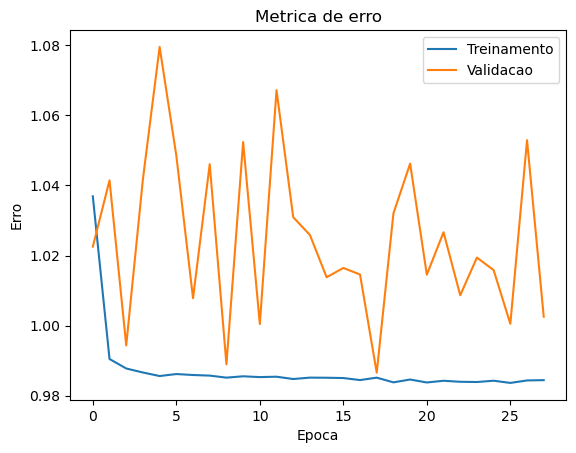

In [411]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# Using target + binary classification

In [207]:
# transforming target

median = df['proficiencia'].median()

print(median)

df['target'] = np.where(df['proficiencia'] > median, 1, 0)
df['target'].value_counts()

-0.207299


target
0    17823
1    17822
Name: count, dtype: int64

In [208]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat', 'proficiencia', 'target'])
y = df['target']

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [210]:
model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dense(8, activation='relu', kernel_regularizer='l2'))

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (980.00 B)

 Trainable params: 245 (980.00 B)

 Non-trainable params: 0 (0.00 B)

In [211]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5599 - loss: 0.8054 - val_accuracy: 0.6154 - val_loss: 0.6955
Epoch 2/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6198 - loss: 0.6848 - val_accuracy: 0.6126 - val_loss: 0.6751
Epoch 3/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6224 - loss: 0.6686 - val_accuracy: 0.6241 - val_loss: 0.6659
Epoch 4/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6273 - loss: 0.6633 - val_accuracy: 0.6297 - val_loss: 0.6624
Epoch 5/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6299 - loss: 0.6587 - val_accuracy: 0.6291 - val_loss: 0.6615
Epoch 6/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6326 - loss: 0.6580 - val_accuracy: 0.6304 - val_loss: 0.6582
Epoch 7/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.6309 - loss: 0.6569 - val_accuracy: 0.6298 - val_loss: 0.6581
Epoch 8/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6293 - loss: 0.6573 - val_ac

In [214]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      2857
           1       0.63      0.64      0.64      2847

    accuracy                           0.63      5704
   macro avg       0.63      0.63      0.63      5704
weighted avg       0.63      0.63      0.63      5704



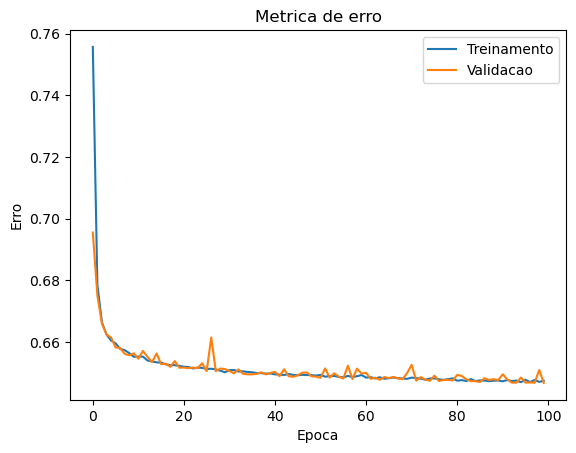

892/892 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step

--> Acuracia (treino): 0.6328
--> Acuracia (validacao): 0.6323
--> acc_train - acc_val = 0.0005
--> E_val - E_in = -0.0007


In [212]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# using softmax + smote

In [429]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat'])
y = df['desempenho_aluno_cat']

y = to_categorical(y)

In [430]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [431]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [432]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dense(6, activation='relu', kernel_regularizer='l2'))
model.add(Dense(6, activation='relu', kernel_regularizer='l2'))
model.add(Dense(3, kernel_initializer='normal', activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [433]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3990 - loss: 1.2034 - val_accuracy: 0.5039 - val_loss: 1.0284
Epoch 2/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.4989 - loss: 1.0189 - val_accuracy: 0.5217 - val_loss: 1.0025
Epoch 3/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5067 - loss: 1.0023 - val_accuracy: 0.5165 - val_loss: 0.9980
Epoch 4/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.5027 - loss: 1.0021 - val_accuracy: 0.5097 - val_loss: 0.9971
Epoch 5/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.5064 - loss: 0.9957 - val_accuracy: 0.5079 - val_loss: 0.9975
Epoch 6/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.5027 - loss: 0.9986 - val_accuracy: 0.5190 - val_loss: 0.9905
Epoch 7/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.5051 - loss: 0.9937 - val_accuracy: 0.5226 - val_loss: 0.9891
Epoch 8/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.5090 - loss: 0.995

In [434]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.59      0.35      0.44       538
           1       0.45      0.44      0.45       765
           2       0.56      0.75      0.64       758

    accuracy                           0.53      2061
   macro avg       0.54      0.51      0.51      2061
weighted avg       0.53      0.53      0.52      2061



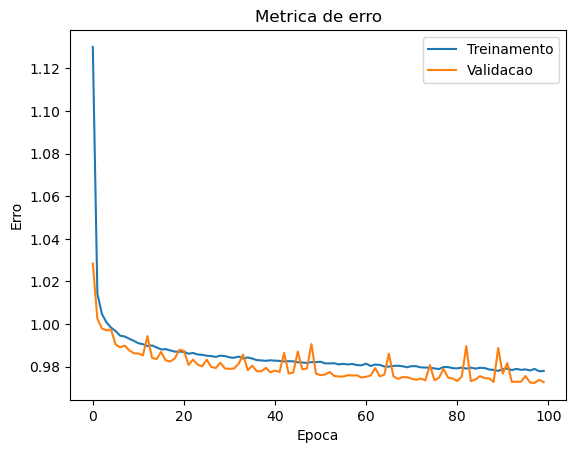

1289/1289 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step

--> Acuracia (treino): 0.2545
--> Acuracia (validacao): 0.2538
--> acc_train - acc_val = 0.0007
--> E_val - E_in = -0.0053


In [435]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# binary + dropping 'Proficiente'

In [437]:
_df = df.copy()
_df = _df[_df['desempenho_aluno'] != 'Proficiente']

In [442]:
median = _df['proficiencia'].median()

print(median)

_df['target'] = np.where(_df['proficiencia'] > median, 1, 0)
_df['target'].value_counts()

-0.294759


target
0    16254
1    16253
Name: count, dtype: int64

In [443]:
X = _df.drop(columns=exclude + ignore_fe_columns + ['desempenho_aluno_cat', 'proficiencia', 'target'])
y = _df['target']

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [445]:
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(8, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)               │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 345 (1.35 KB)

 Trainable params: 345 (1.35 KB)

 Non-trainable params: 0 (0.00 B)

In [446]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5276 - loss: 0.6888 - val_accuracy: 0.6090 - val_loss: 0.6574
Epoch 2/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6114 - loss: 0.6565 - val_accuracy: 0.6133 - val_loss: 0.6560
Epoch 3/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6085 - loss: 0.6585 - val_accuracy: 0.6136 - val_loss: 0.6556
Epoch 4/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6130 - loss: 0.6553 - val_accuracy: 0.6129 - val_loss: 0.6553
Epoch 5/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6118 - loss: 0.6566 - val_accuracy: 0.6115 - val_loss: 0.6550
Epoch 6/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.6121 - loss: 0.6561 - val_accuracy: 0.6128 - val_loss: 0.6547
Epoch 7/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.6130 - loss: 0.6555 - val_accuracy: 0.6142 - val_loss: 0.6556
Epoch 8/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6140 - loss: 0.6541 - val_

In [447]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
              precision    recall  f1-score   support

           0       0.60      0.65      0.63      2618
           1       0.61      0.56      0.59      2583

    accuracy                           0.61      5201
   macro avg       0.61      0.61      0.61      5201
weighted avg       0.61      0.61      0.61      5201



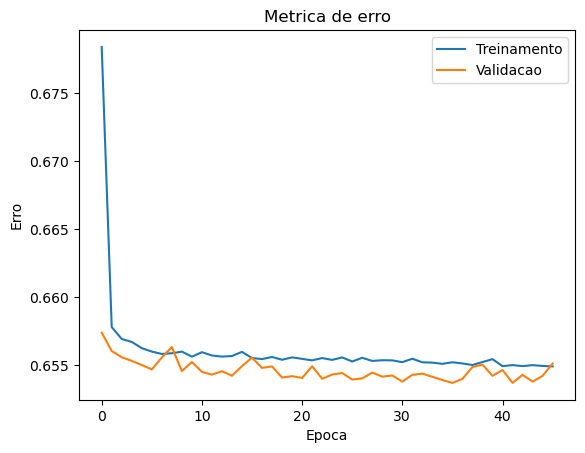

813/813 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step

--> Acuracia (treino): 0.6128
--> Acuracia (validacao): 0.6142
--> acc_train - acc_val = -0.0014
--> E_val - E_in = 0.0002


In [448]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# binary + dropping 'Básico'

In [450]:
_df = df.copy()
_df = _df[_df['desempenho_aluno'] != 'Básico']

In [451]:
median = _df['proficiencia'].median()

print(median)

_df['target'] = np.where(_df['proficiencia'] > median, 1, 0)
_df['target'].value_counts()

-0.760409


target
0    8315
1    8314
Name: count, dtype: int64

In [452]:
X = _df.drop(columns=exclude + ignore_fe_columns + ['desempenho_aluno_cat', 'proficiencia', 'target'])
y = _df['target']

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [454]:
model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dense(8, activation='relu', kernel_regularizer='l2'))

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_106 (Dense)               │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197 (788.00 B)

 Trainable params: 197 (788.00 B)

 Non-trainable params: 0 (0.00 B)

In [455]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5144 - loss: 0.8237 - val_accuracy: 0.5647 - val_loss: 0.7426
Epoch 2/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5742 - loss: 0.7293 - val_accuracy: 0.5926 - val_loss: 0.7022
Epoch 3/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5975 - loss: 0.6977 - val_accuracy: 0.6026 - val_loss: 0.6878
Epoch 4/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5905 - loss: 0.6866 - val_accuracy: 0.5995 - val_loss: 0.6806
Epoch 5/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5951 - loss: 0.6822 - val_accuracy: 0.6010 - val_loss: 0.6770
Epoch 6/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5925 - loss: 0.6797 - val_accuracy: 0.6097 - val_loss: 0.6743
Epoch 7/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6079 - loss: 0.6769 - val_accuracy: 0.6128 - val_loss: 0.6734
Epoch 8/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6146 - loss: 0.6725 - val_accu

In [456]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
              precision    recall  f1-score   support

           0       0.60      0.65      0.63      1345
           1       0.61      0.56      0.59      1316

    accuracy                           0.61      2661
   macro avg       0.61      0.61      0.61      2661
weighted avg       0.61      0.61      0.61      2661



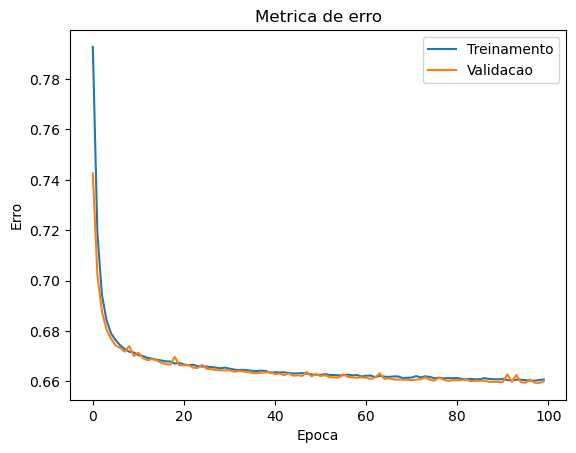

416/416 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step

--> Acuracia (treino): 0.6144
--> Acuracia (validacao): 0.6160
--> acc_train - acc_val = -0.0016
--> E_val - E_in = -0.0008


In [457]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")